In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우 기본 한글 폰트
plt.rcParams['axes.unicode_minus'] = False     # 마이너스 깨짐 방지

In [3]:
df = pd.read_csv('../data/passenger_analysis.csv', encoding='cp949')
df.head()

,년월_dt,년도,월,항공사(IATA),항공사명,국제_국내,정기_부정기,도착_출발,공항,영문공항명,...,한글국가명,영문도시명,여객_화물,유임승객(명),무임승객(명),환승객(명),총여객(명),운항(편),평균탑승객(명/편)_proxy,수하물(kg)
0,2022-01-01,2022,1,AA,아메리칸항공,국제,정기,도착,DFW,Dallas/Fort Worth International Airport,...,미국,Dallas,여객,2725,17,132,2874,NaN,NaN,63814
1,2022-01-01,2022,1,AA,아메리칸항공,국제,부정기,도착,DFW,Dallas/Fort Worth International Airport,...,미국,Dallas,화물,0,0,0,0,NaN,NaN,0
2,2022-01-01,2022,1,AA,아메리칸항공,국제,정기,출발,DFW,Dallas/Fort Worth International Airport,...,미국,Dallas,여객,3703,26,107,3836,NaN,NaN,86073
3,2022-01-01,2022,1,AA,아메리칸항공,국제,부정기,출발,DFW,Dallas/Fort Worth International Airport,...,미국,Dallas,화물,0,0,0,0,NaN,NaN,0
4,2022-01-01,2022,1,AA,아메리칸항공,국제,부정기,도착,LAX,Los Angeles International Airport,...,미국,Los Angeles,화물,0,0,0,0,NaN,NaN,0


In [4]:
#코로나 회복기 이후(202207~202506), 여객 데이터 활용
print(df.shape)
df = df[(df['년월_dt'] >= '2022-07-01') & (df['여객_화물'] == '여객')]
print(df.shape)
df.head()

(45206, 21)
(27660, 21)


,년월_dt,년도,월,항공사(IATA),항공사명,국제_국내,정기_부정기,도착_출발,공항,영문공항명,...,한글국가명,영문도시명,여객_화물,유임승객(명),무임승객(명),환승객(명),총여객(명),운항(편),평균탑승객(명/편)_proxy,수하물(kg)
5248,2022-07-01,2022,7,AA,아메리칸항공,국제,정기,도착,DFW,Dallas/Fort Worth International Airport,...,미국,Dallas,여객,6869,38,816,7723,NaN,NaN,197540
5249,2022-07-01,2022,7,AA,아메리칸항공,국제,정기,출발,DFW,Dallas/Fort Worth International Airport,...,미국,Dallas,여객,7612,40,619,8271,NaN,NaN,192916
5250,2022-07-01,2022,7,OZ,아시아나항공,국내,부정기,도착,CJU,Jeju International Airport,...,대한민국,Jeju,여객,337,2,0,339,NaN,NaN,1846
5251,2022-07-01,2022,7,OZ,아시아나항공,국제,정기,도착,ALA,Almaty International Airport,...,카자흐스탄,Almaty,여객,2109,28,265,2402,NaN,NaN,30945
5252,2022-07-01,2022,7,OZ,아시아나항공,국제,정기,출발,ALA,Almaty International Airport,...,카자흐스탄,Almaty,여객,1339,13,361,1713,NaN,NaN,32178


In [5]:
#데이터 확인
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 27660 entries, 5248 to 45205
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   년월_dt             27660 non-null  object 
 1   년도                27660 non-null  int64  
 2   월                 27660 non-null  int64  
 3   항공사(IATA)         27660 non-null  object 
 4   항공사명              27660 non-null  object 
 5   국제_국내             27660 non-null  object 
 6   정기_부정기            27660 non-null  object 
 7   도착_출발             27660 non-null  object 
 8   공항                27660 non-null  object 
 9   영문공항명             27660 non-null  object 
 10  지역                27660 non-null  object 
 11  한글국가명             27660 non-null  object 
 12  영문도시명             27660 non-null  object 
 13  여객_화물             27660 non-null  object 
 14  유임승객(명)           27660 non-null  int64  
 15  무임승객(명)           27660 non-null  int64  
 16  환승객(명)            27660 non-null  int64  


In [6]:
#데이터 통계(숫자형)
df.describe()
#데이터 통계(문자형)
df.describe(include='O')

c:\Users\최다연\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,년월_dt,항공사(IATA),항공사명,국제_국내,정기_부정기,도착_출발,공항,영문공항명,지역,한글국가명,영문도시명,여객_화물
count,27660,27660,27660,27660,27660,27660,27660,27660,27660,27660,27660,27660
unique,36,93,93,2,2,2,221,221,7,62,211,1
top,2024-10-01,KE,대한항공,국제,정기,도착,NRT,Narita International Airport,아시아태평양,중국,Tokyo,여객
freq,920,6164,6164,27369,24526,13983,948,948,22100,5538,1131,27660


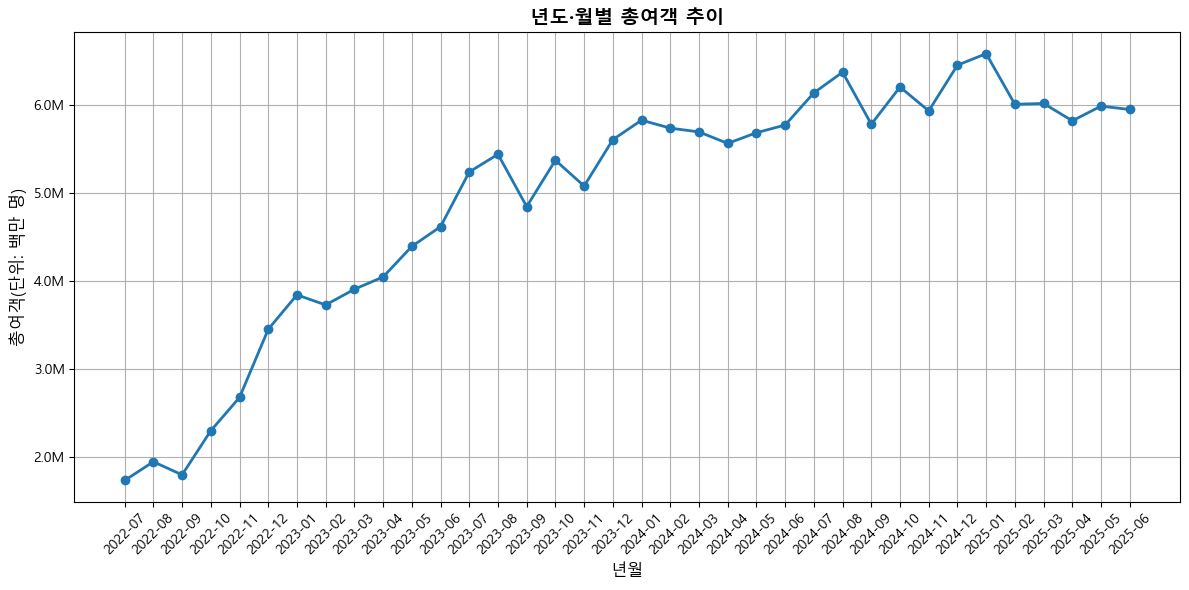

In [7]:
#년도, 월별 여객 추이(계절성, 관광 수요 회복 지표)
grouped = df.groupby(['년도','월'])['총여객(명)'].sum().reset_index()

#그래프용 컬럼 생성
grouped['년월'] = grouped['년도'].astype('str') + '-' + grouped['월'].astype('str').str.zfill(2)
grouped

#꺾은선 그래프
#y축(총여객(수)) 백만 단위 표시 함수 생성
from matplotlib.ticker import FuncFormatter
def millions(y, _):
    return f'{y*1e-6:.1f}M'

plt.figure(figsize=(12,6))
plt.plot(grouped['년월'], grouped['총여객(명)'], marker='o', linewidth=2)

#y축(총여객(수)) 백만 단위 표시 함수 적용
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))

plt.title('년도·월별 총여객 추이', fontsize=14, fontweight='bold')
plt.xlabel('년월', fontsize=12)
plt.ylabel('총여객(단위: 백만 명)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [8]:
#총여객(명) 순으로 top10 정렬
#의외 point - 9월, 11월에는 여객 수요 꺾이는 경향을 보임, 2월부터 꺾이고, 4월 반등 추세
passenger_top = grouped.nlargest(10, '총여객(명)').reset_index(drop=True)
passenger_top

,년도,월,총여객(명),년월
0,2025,1,6581937,2025-01
1,2024,12,6451626,2024-12
2,2024,8,6371478,2024-08
3,2024,10,6203582,2024-10
4,2024,7,6137513,2024-07
5,2025,3,6017200,2025-03
6,2025,2,6007453,2025-02
7,2025,5,5986584,2025-05
8,2025,6,5948531,2025-06
9,2024,11,5932689,2024-11


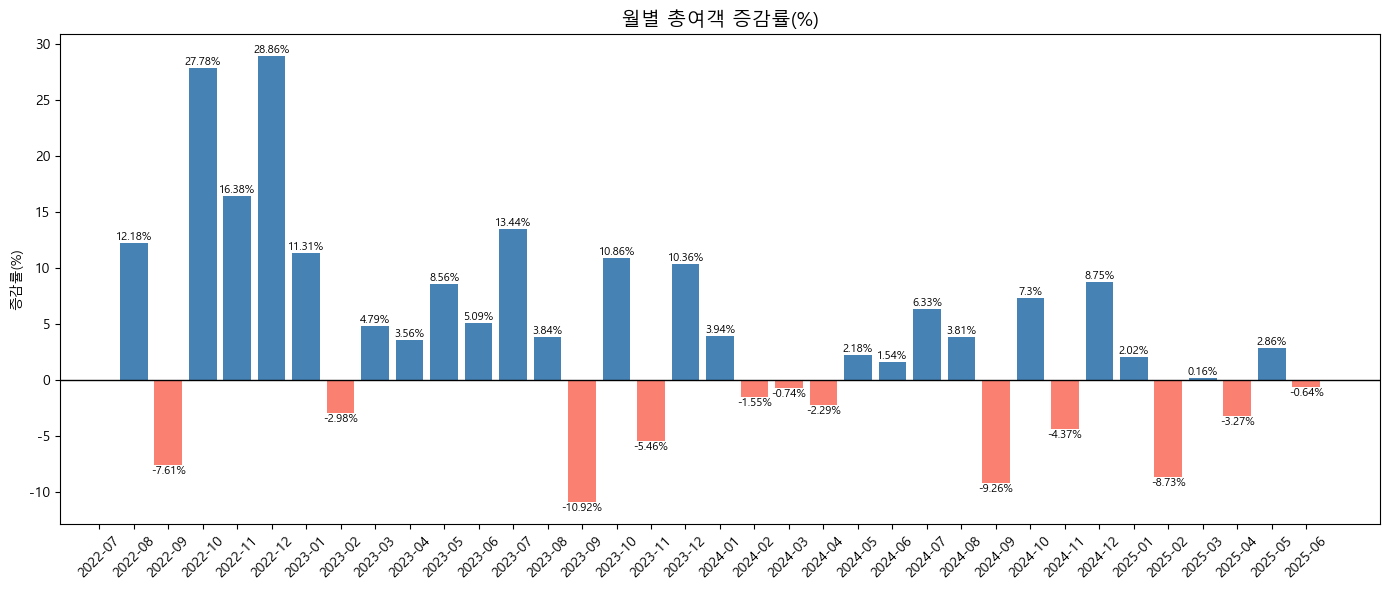

In [9]:
# 년도,월별 총여객 수 증감률 
grouped['전월_총여객(명)'] = grouped['총여객(명)'].shift(1)
grouped['증감률(%)'] = ((grouped['총여객(명)'] - grouped['전월_총여객(명)'])*100 / grouped['전월_총여객(명)']).round(2)
grouped

#바 그래프
plt.figure(figsize=(14, 6))

# 증가(+):파랑 / 감소(-):빨강
colors = grouped['증감률(%)'].apply(lambda x: 'steelblue' if x >= 0 else 'salmon')
plt.bar(grouped['년월'], grouped['증감률(%)'], color=colors)

# 0 기준선
plt.axhline(0, color='black', linewidth=1)

# 값 표시
for idx, value in enumerate(grouped['증감률(%)']):
    plt.text(idx, value, f"{value}%", 
             ha='center', 
             va='bottom' if value > 0 else 'top',
             fontsize=8)

plt.xticks(rotation=45)
plt.title("월별 총여객 증감률(%)", fontsize=14)
plt.ylabel("증감률(%)")

plt.tight_layout()
plt.show()

In [10]:
#최근 3년 중 피크 성수기 top5 기준 인기 노선 분석
#2025.01, 2024.12 winter_peak
#2024.08, 2024.10, 2024.07 summer_peak

def peak_season(df, months, n=20):
    peak_df = df[df['년월_dt'].isin(months)]
    grouped = peak_df.groupby(['공항', '영문공항명', '도착_출발'])['총여객(명)'].sum().reset_index()
    return grouped.nlargest(n, '총여객(명)').reset_index(drop=True)

wt_route = peak_season(df, ['2025-01-01', '2024-12-01'], 20)
sm_route = peak_season(df, ['2024-08-01', '2024-10-01', '2024-07-01'], 20)

wt_route

,공항,영문공항명,도착_출발,총여객(명)
0,NRT,Narita International Airport,출발,414020
1,NRT,Narita International Airport,도착,406475
2,KIX,Kansai International Airport,출발,402652
3,KIX,Kansai International Airport,도착,392502
4,FUK,Fukuoka Airport,출발,304756
5,FUK,Fukuoka Airport,도착,299061
6,BKK,Suvarnabhumi Airport,출발,279945
7,BKK,Suvarnabhumi Airport,도착,261495
8,HKG,Hong Kong International Airport,도착,251053
9,HKG,Hong Kong International Airport,출발,251047


In [11]:
sm_route

,공항,영문공항명,도착_출발,총여객(명)
0,NRT,Narita International Airport,도착,644551
1,NRT,Narita International Airport,출발,622117
2,KIX,Kansai International Airport,도착,551730
3,KIX,Kansai International Airport,출발,534447
4,FUK,Fukuoka Airport,도착,424664
5,FUK,Fukuoka Airport,출발,417129
6,HKG,Hong Kong International Airport,출발,371802
7,HKG,Hong Kong International Airport,도착,365970
8,BKK,Suvarnabhumi Airport,출발,342740
9,BKK,Suvarnabhumi Airport,도착,338164


In [12]:
#인기 여행지 분석(성수기, 성수기 대비 상대적 비수기)

peak_month = ['2025-01-01', '2024-12-01', '2024-08-01', '2024-10-01', '2024-07-01']
non_peak_df = df[~df['년월_dt'].isin(peak_month)]    

def hot_spot(df, months=None, n=10):
    if months is not None:
        df = df[df['년월_dt'].isin(months)]
    grouped = df.groupby(['공항', '영문공항명', '지역', '한글국가명', '영문도시명'])['총여객(명)'].sum().reset_index()
    return grouped.nlargest(n, '총여객(명)').reset_index(drop=True)

wt_spot = hot_spot(df, months=['2025-01-01', '2024-12-01'], n=10)
sm_spot = hot_spot(df, months=['2024-08-01', '2024-10-01', '2024-07-01'], n=10)        
non_peak_spot = hot_spot(non_peak_df, n=10)

wt_spot

,공항,영문공항명,지역,한글국가명,영문도시명,총여객(명)
0,NRT,Narita International Airport,아시아태평양,일본,Tokyo,820495
1,KIX,Kansai International Airport,아시아태평양,일본,Osaka,795154
2,FUK,Fukuoka Airport,아시아태평양,일본,Fukuoka,603817
3,BKK,Suvarnabhumi Airport,아시아태평양,태국,Bangkok,541440
4,HKG,Hong Kong International Airport,아시아태평양,홍콩,Hong Kong,502100
5,TPE,Taiwan Taoyuan International Airport,아시아태평양,대만,Taipei,436609
6,SIN,Singapore Changi Airport,아시아태평양,싱가포르,Singapore,386787
7,DAD,Da Nang International Airport,아시아태평양,베트남,Da Nang,382557
8,MNL,Ninoy Aquino International Airport,아시아태평양,필리핀,Manila,351157
9,CXR,Cam Ranh International Airport,아시아태평양,베트남,NhaTrang,337724


In [13]:
sm_spot

,공항,영문공항명,지역,한글국가명,영문도시명,총여객(명)
0,NRT,Narita International Airport,아시아태평양,일본,Tokyo,1266668
1,KIX,Kansai International Airport,아시아태평양,일본,Osaka,1086177
2,FUK,Fukuoka Airport,아시아태평양,일본,Fukuoka,841793
3,HKG,Hong Kong International Airport,아시아태평양,홍콩,Hong Kong,737772
4,BKK,Suvarnabhumi Airport,아시아태평양,태국,Bangkok,680904
5,TPE,Taiwan Taoyuan International Airport,아시아태평양,대만,Taipei,561508
6,DAD,Da Nang International Airport,아시아태평양,베트남,Da Nang,515518
7,PVG,Shanghai Pudong International Airport,아시아태평양,중국,Shanghai,473019
8,SIN,Singapore Changi Airport,아시아태평양,싱가포르,Singapore,471319
9,CXR,Cam Ranh International Airport,아시아태평양,베트남,NhaTrang,448670


In [14]:
non_peak_spot

,공항,영문공항명,지역,한글국가명,영문도시명,총여객(명)
0,NRT,Narita International Airport,아시아태평양,일본,Tokyo,9503589
1,KIX,Kansai International Airport,아시아태평양,일본,Osaka,9271232
2,FUK,Fukuoka Airport,아시아태평양,일본,Fukuoka,6969215
3,BKK,Suvarnabhumi Airport,아시아태평양,태국,Bangkok,6892184
4,SIN,Singapore Changi Airport,아시아태평양,싱가포르,Singapore,4966523
5,TPE,Taiwan Taoyuan International Airport,아시아태평양,대만,Taipei,4790126
6,HKG,Hong Kong International Airport,아시아태평양,홍콩,Hong Kong,4789153
7,DAD,Da Nang International Airport,아시아태평양,베트남,Da Nang,4770772
8,MNL,Ninoy Aquino International Airport,아시아태평양,필리핀,Manila,4056739
9,SGN,Tan Son Nhat International Airport,아시아태평양,베트남,HoChiMinh,4056520


In [15]:
#중국 여객 수요 상승 확인(2024~2025)
def china(df, year, n=10):
    year_df = df[df['년도']== year]
    grouping = year_df.groupby(['공항', '영문공항명', '지역', '한글국가명', '영문도시명'])['총여객(명)'].sum().reset_index()
    return grouping.nlargest(n, '총여객(명)').reset_index(drop=True)

years = [2024,2025]
result = []
for y in years:
    checking = china(df, y, n=10)
    result.append(checking)

pd.concat(result, axis=0)

,공항,영문공항명,지역,한글국가명,영문도시명,총여객(명)
0,NRT,Narita International Airport,아시아태평양,일본,Tokyo,4837254
1,KIX,Kansai International Airport,아시아태평양,일본,Osaka,4464760
2,FUK,Fukuoka Airport,아시아태평양,일본,Fukuoka,3376186
3,BKK,Suvarnabhumi Airport,아시아태평양,태국,Bangkok,2960587
4,HKG,Hong Kong International Airport,아시아태평양,홍콩,Hong Kong,2680682
5,TPE,Taiwan Taoyuan International Airport,아시아태평양,대만,Taipei,2315298
6,DAD,Da Nang International Airport,아시아태평양,베트남,Da Nang,2112961
7,SIN,Singapore Changi Airport,아시아태평양,싱가포르,Singapore,2005750
8,CXR,Cam Ranh International Airport,아시아태평양,베트남,NhaTrang,1766778
9,MNL,Ninoy Aquino International Airport,아시아태평양,필리핀,Manila,1753038


In [16]:
#성수기(동계,하계) & 비성수기 트리맵
wt_spot['시즌'] = '동계'
sm_spot['시즌'] = '하계'
non_peak_spot['시즌'] = '비성수기'

merged = pd.concat([wt_spot, sm_spot], ignore_index=True)
merged


,공항,영문공항명,지역,한글국가명,영문도시명,총여객(명),시즌
0,NRT,Narita International Airport,아시아태평양,일본,Tokyo,820495,동계
1,KIX,Kansai International Airport,아시아태평양,일본,Osaka,795154,동계
2,FUK,Fukuoka Airport,아시아태평양,일본,Fukuoka,603817,동계
3,BKK,Suvarnabhumi Airport,아시아태평양,태국,Bangkok,541440,동계
4,HKG,Hong Kong International Airport,아시아태평양,홍콩,Hong Kong,502100,동계
5,TPE,Taiwan Taoyuan International Airport,아시아태평양,대만,Taipei,436609,동계
6,SIN,Singapore Changi Airport,아시아태평양,싱가포르,Singapore,386787,동계
7,DAD,Da Nang International Airport,아시아태평양,베트남,Da Nang,382557,동계
8,MNL,Ninoy Aquino International Airport,아시아태평양,필리핀,Manila,351157,동계
9,CXR,Cam Ranh International Airport,아시아태평양,베트남,NhaTrang,337724,동계


In [17]:
import plotly.express as px
def treemap(df):
    fig = px.treemap(
        df,                                     # 시즌별+국가+도시 df 사용
        path=['시즌', '한글국가명', '영문도시명'],      # 계층 구조
        values='총여객(명)',
        color='총여객(명)',
        color_continuous_scale='YlOrRd',
        title='시즌 → 국가 → 도시 계층형 Top10 Treemap'
    )

    fig.update_layout(
        title_font_size=24,
        margin=dict(t=50, l=25, r=25, b=25)
    )

    return fig.show()

treemap(merged)
treemap(non_peak_spot)

In [18]:
#항공사별 점유율(총여객(명) 기준) 추이
def airplane_share(df, year, n=10):
    year_df = df[df['년도'] == year]
    grouped = year_df.groupby(['년도', '항공사(IATA)', '항공사명'])['총여객(명)'].sum().reset_index()
    grouped['점유율(%)'] = (grouped['총여객(명)'] / grouped['총여객(명)'].sum() * 100).round(2)
    return grouped.nlargest(10, '총여객(명)').reset_index(drop=True)

years = [2022, 2023, 2024, 2025]
result = []
for y in years: 
    share = airplane_share(df, y)
    result.append(share)

airline_trend = pd.concat(result, ignore_index=True)
airline_trend


,년도,항공사(IATA),항공사명,총여객(명),점유율(%)
0,2022,KE,대한항공,3646644,26.18
1,2022,OZ,아시아나항공,2209536,15.86
2,2022,7C,제주항공,1017741,7.31
3,2022,TW,티웨이항공,791822,5.68
4,2022,LJ,진 에어,763687,5.48
5,2022,VJ,비엣제트항공,652481,4.68
6,2022,DL,델타항공,324827,2.33
7,2022,RS,에어서울,322951,2.32
8,2022,VN,베트남항공,304135,2.18
9,2022,BX,에어 부산,281373,2.02


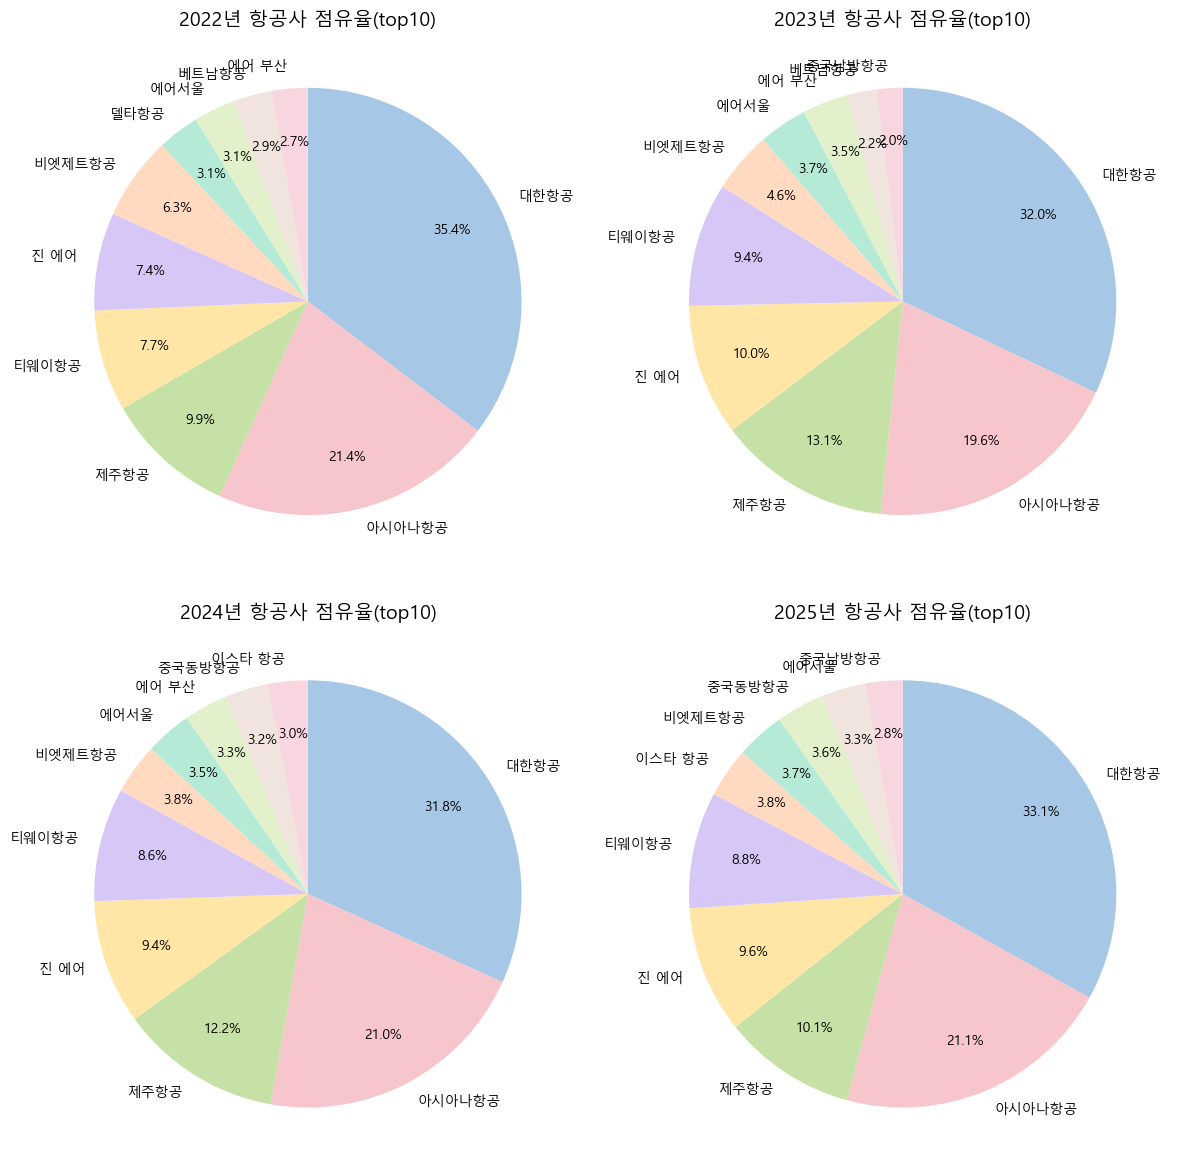

In [19]:
#년도별 항공사 점유율 비교 차트(파이차트)
#필요 데이터 : 년도, 항공사명, 점유율(%)
colors = [
    "#A7C7E7",  # 파스텔 블루
    "#F7C5CC",  # 파스텔 핑크
    "#C5E1A5",  # 파스텔 그린
    "#FFE6A7",  # 파스텔 옐로우
    "#D7C7F7",  # 파스텔 퍼플
    "#FFDAC1",  # 살구색
    "#B5EAD7",  # 민트색
    "#E2F0CB",  # 연둣빛
    "#F1E3DD",  # 베이지
    "#F7D6E0"   # 연한 로즈
]

plt.figure(figsize=(12,12))

for idx, year in enumerate(years,1):
    df_year = airline_trend[airline_trend['년도'] == year]

    #파이 차트 만들기
    plt.subplot(2,2,idx)
    plt.pie(
        df_year['점유율(%)'],
        labels=df_year['항공사명'],
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False,
        labeldistance=1.1,
        pctdistance=0.75,
        colors=colors,
        )

    plt.title(f'{year}년 항공사 점유율(top10)', fontsize = 14)

plt.tight_layout()
plt.show()

In [20]:
#국제, 국내 노선별 항공사 선호도
def distance(df, year, n):
    year_df = df[df['년도'] == year]
    grouping = year_df.groupby(['년도', '국제_국내', '항공사(IATA)', '항공사명'])['총여객(명)'].sum().reset_index()
    grouping['점유율(%)'] = (grouping['총여객(명)'] / grouping.groupby('국제_국내')['총여객(명)'].transform('sum')*100).round(2)
    return grouping[grouping['국제_국내'] == n].nlargest(10, '총여객(명)').reset_index(drop=True)

years = [2022, 2023, 2024, 2025]
result1=[]
result2=[]
for y in years:
    domestic = distance(df, y, '국내')
    abroad = distance(df, y, '국제')
    result1.append(domestic)
    result2.append(abroad)

domestic_prefer = pd.concat(result1, ignore_index=True)
abroad_prefer = pd.concat(result2, ignore_index=True)

domestic_prefer 

,년도,국제_국내,항공사(IATA),항공사명,총여객(명),점유율(%)
0,2022,국내,KE,대한항공,41904,93.12
1,2022,국내,7C,제주항공,1081,2.40
2,2022,국내,OZ,아시아나항공,970,2.16
3,2022,국내,LJ,진 에어,475,1.06
4,2022,국내,RS,에어서울,213,0.47
5,2022,국내,TW,티웨이항공,183,0.41
6,2022,국내,BX,에어 부산,176,0.39
7,2023,국내,KE,대한항공,348534,94.89
8,2023,국내,7C,제주항공,6384,1.74
9,2023,국내,OZ,아시아나항공,3708,1.01


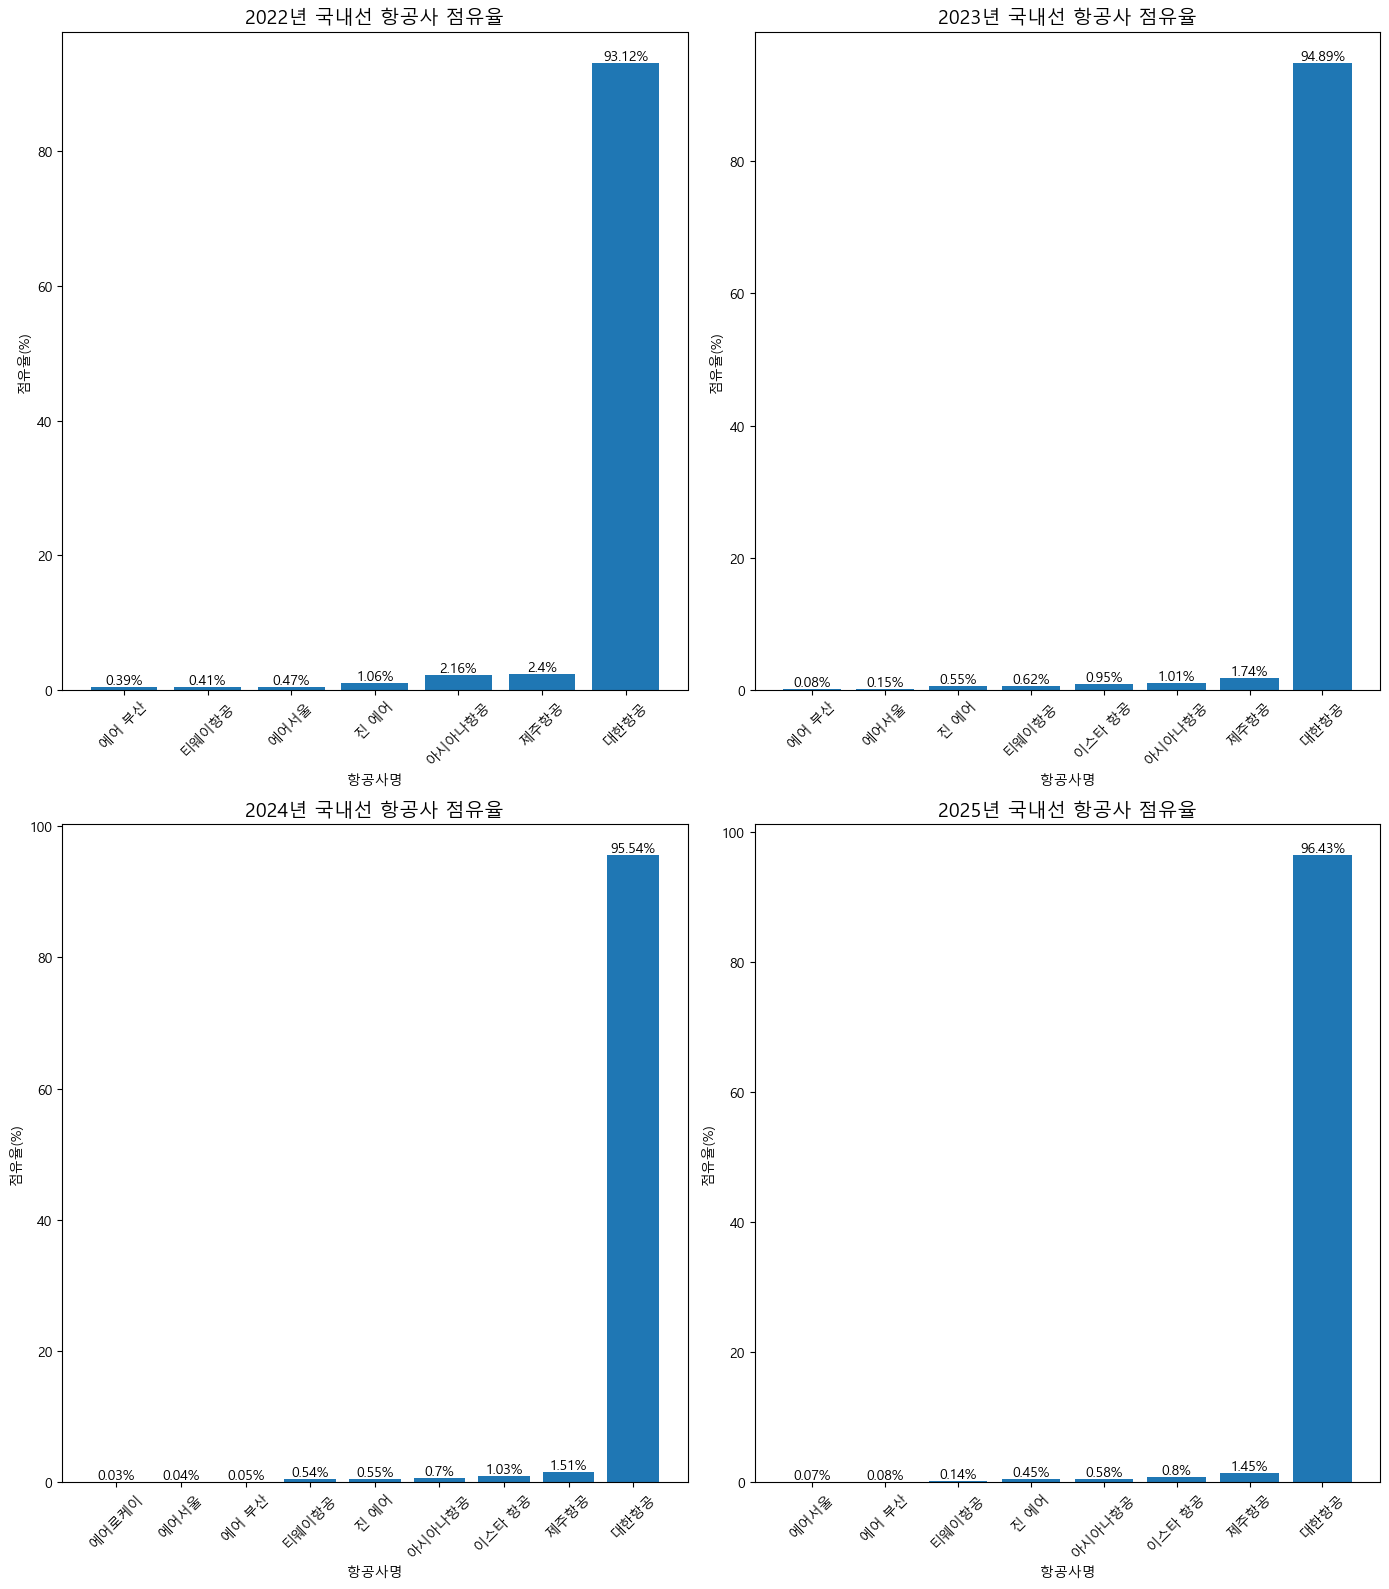

In [21]:
#년도별 국내선 항공사 선호도(파이차트)
#필요 항목 : 년도, 항공사명, 비율

plt.figure(figsize=(14,16))

for idx, year in enumerate(years, 1):
    df_year = domestic_prefer[domestic_prefer['년도'] == year].sort_values('점유율(%)') 
    
    plt.subplot(2,2,idx)
    bars = plt.bar(df_year['항공사명'], df_year['점유율(%)'])

    # 막대 위에 값 표시
    for bar, pct in zip(bars, df_year['점유율(%)']):
        plt.text(
            bar.get_x() + bar.get_width()/2,
            bar.get_height(),
            f"{pct}%",
            ha='center',
            va='bottom',
            fontsize=10
        )

    plt.title(f'{year}년 국내선 항공사 점유율', fontsize = 14)
    plt.xlabel("항공사명")
    plt.ylabel("점유율(%)")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [22]:
#공항별 환승객 비율, 공항별 환승 수요(환승 허브), ICN출발/도착을 기준으로 분석한 데이터임을 명시할 필요가 있음
#환승객 - 규모(scale)/절대량 <> 환승비율 - 성격(characteristics)/운영성격
#절대 수요(환승객(명))를 선반영하여 환승비율(%)을 고려할 필요가 있다. -> 환승 허브의 의미를 갖기 위해 / 두 지표의 조합 scatter plot
#여객 수요가 아시아태평양 지역에 몰려있으므로, 지역을 제한하여 분석할 필요가 있다고 사료됨
asia_df = df[df['지역'] == '아시아태평양']
grouped = asia_df.groupby(['공항','영문공항명','한글국가명']).agg({'환승객(명)':'sum', '총여객(명)':'sum'}).reset_index()
grouped['환승비율(%)'] = (grouped['환승객(명)'] / grouped['총여객(명)'] * 100).round(2)
airport_top10 = grouped.nlargest(10, '환승객(명)').reset_index(drop=True)
airport_top10
#환승 수요는 ICN 출발 + ICN 도착 여정 모두 포함

,공항,영문공항명,한글국가명,환승객(명),총여객(명),환승비율(%)
0,MNL,Ninoy Aquino International Airport,필리핀,1502207,4823862,31.14
1,SGN,Tan Son Nhat International Airport,베트남,1102473,4790320,23.01
2,BKK,Suvarnabhumi Airport,태국,850363,8114528,10.48
3,NRT,Narita International Airport,일본,587447,11590752,5.07
4,PVG,Shanghai Pudong International Airport,중국,582381,3565309,16.33
5,PEK,Beijing Capital International Airport,중국,449540,1739502,25.84
6,HKG,Hong Kong International Airport,홍콩,440543,6029025,7.31
7,KIX,Kansai International Airport,일본,438983,11152563,3.94
8,UBN,Chinggis Khaan International Airport,몽골,329071,1715863,19.18
9,SIN,Singapore Changi Airport,싱가포르,302121,5824629,5.19


In [41]:
#항공사별 환승 수요
grouped = df.groupby(['항공사(IATA)', '항공사명']).agg({'환승객(명)':'sum', '총여객(명)':'sum'}).reset_index()
grouped['환승비율(%)'] = (grouped['환승객(명)'] / grouped['총여객(명)'] * 100).round(2)
airplane_top10 = grouped.sort_values('환승객(명)', ascending=False).reset_index(drop=True).iloc[:10]
airplane_top10

,항공사(IATA),항공사명,환승객(명),총여객(명),환승비율(%)
0,KE,대한항공,10206078,42267405,24.15
1,OZ,아시아나항공,5319106,26919752,19.76
2,DL,델타항공,1194739,2465554,48.46
3,AC,캐나다항공,424422,1253258,33.87
4,7C,제주항공,301536,15490395,1.95
5,TW,티웨이항공,236070,11483192,2.06
6,LJ,진 에어,155828,12358514,1.26
7,UA,유나이티드항공,135683,801822,16.92
8,VN,베트남항공,130843,2714677,4.82
9,OM,몽골항공,110540,721874,15.31


In [24]:
#항공사별 환승 수요(국적기 제외)
df_non_kr = df[~df['항공사(IATA)'].isin(['KE', 'OZ', '7C', 'TW', 'LJ', 'ZE'])]
grouped = df_non_kr.groupby(['항공사(IATA)', '항공사명']).agg({'환승객(명)':'sum', '총여객(명)':'sum'}).reset_index()
grouped['환승비율(%)'] = (grouped['환승객(명)'] / grouped['총여객(명)'] * 100).round(2)
for_airplane_top10 = grouped.sort_values('환승객(명)', ascending=False).reset_index(drop=True).iloc[:10]
for_airplane_top10

,항공사(IATA),항공사명,환승객(명),총여객(명),환승비율(%)
0,DL,델타항공,1194739,2465554,48.46
1,AC,캐나다항공,424422,1253258,33.87
2,UA,유나이티드항공,135683,801822,16.92
3,VN,베트남항공,130843,2714677,4.82
4,OM,몽골항공,110540,721874,15.31
5,AA,아메리칸항공,91507,557543,16.41
6,CA,중국국제항공,83965,1670684,5.03
7,MU,중국동방항공,73765,3480665,2.12
8,SC,산동항공,62942,1691328,3.72
9,PR,필리핀항공,51835,1335044,3.88


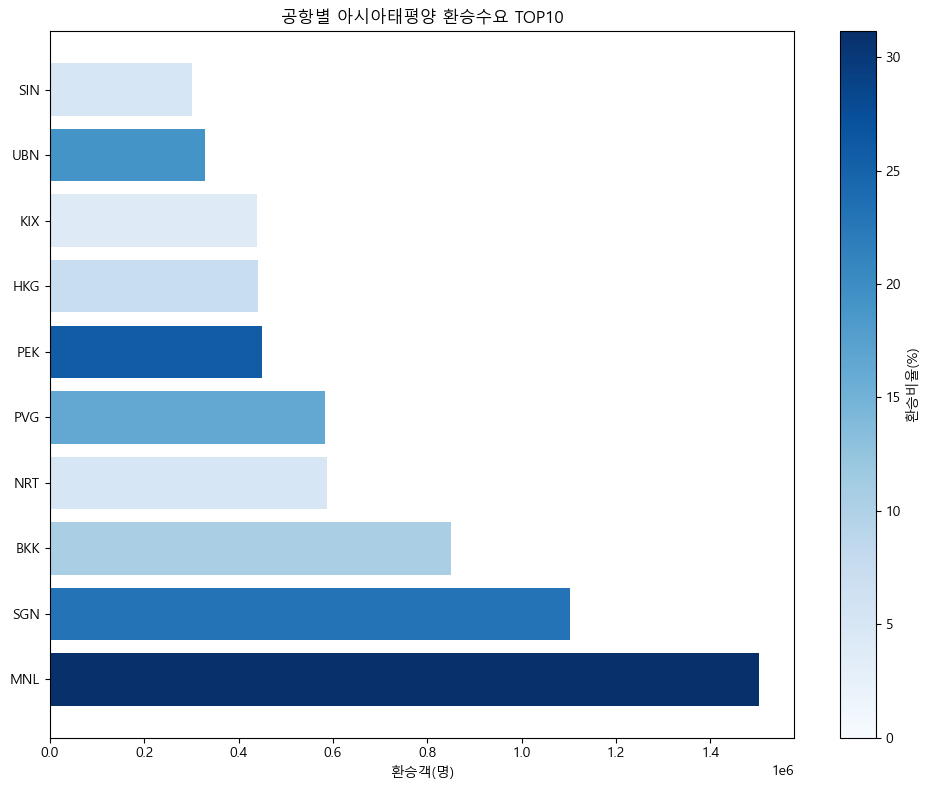

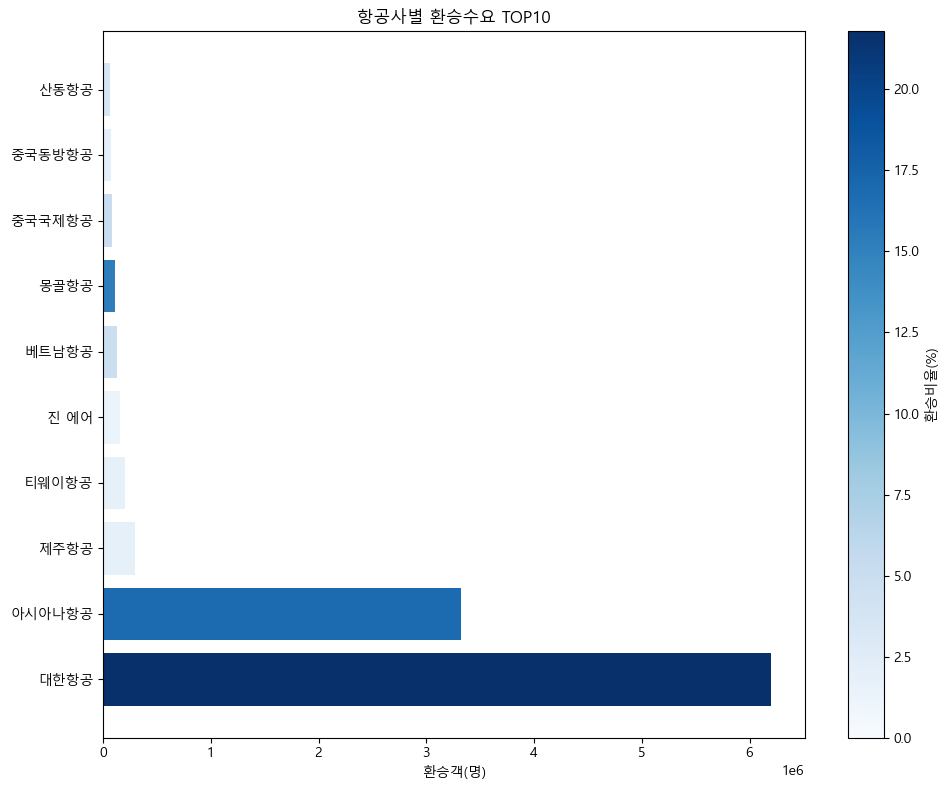

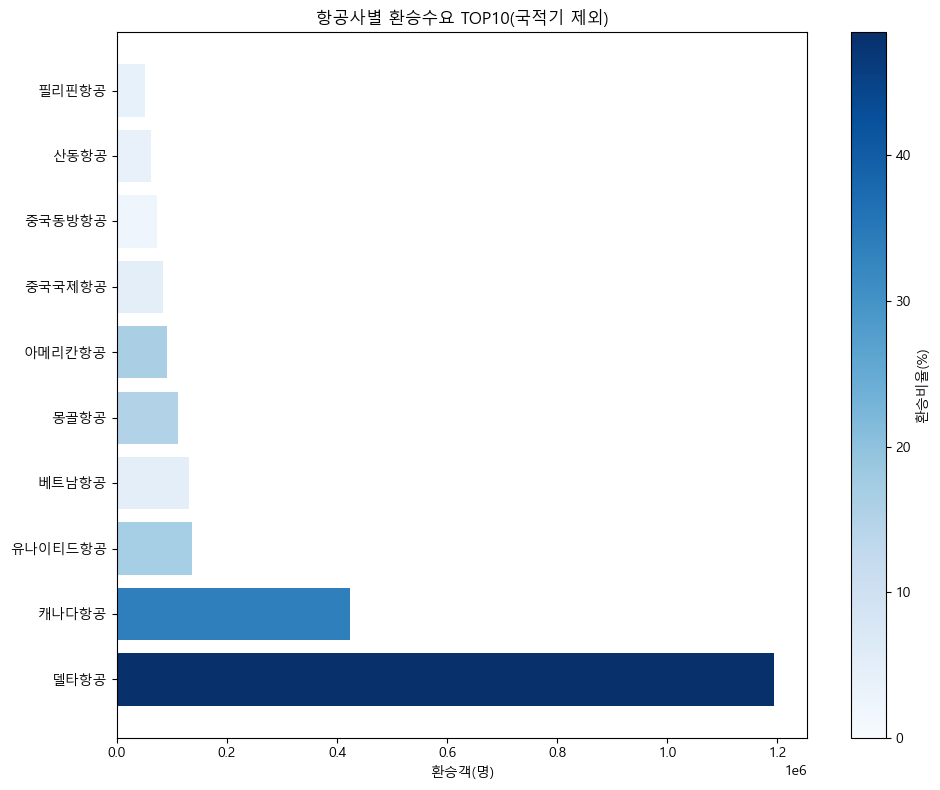

In [25]:
#공항별 환승수요 top20 시각화
#환승비율 정규화(0~1)

def barh(df, y_col, title):
    colors = df['환승비율(%)'] / df['환승비율(%)'].max()

    fig, ax = plt.subplots(figsize=(10,8))

    #가로 막대 그래프 + 컬러맵 색상 적용
    bars = ax.barh(df[y_col], 
            df['환승객(명)'], 
            color=plt.cm.Blues(colors))

    ax.set_xlabel('환승객(명)')
    ax.set_title(title)

    #컬러바
    sm = plt.cm.ScalarMappable(cmap='Blues', 
                            norm=plt.Normalize(0, df['환승비율(%)'].max()))
    sm.set_array([])

    bar = fig.colorbar(sm, ax=ax) #ax그래프 영역 옆에 붙어라
    bar.set_label('환승비율(%)')

    plt.tight_layout()
    return plt.show()

barh(airport_top10, '공항', '공항별 아시아태평양 환승수요 TOP10')
barh(airplane_top10, '항공사명', '항공사별 환승수요 TOP10')
barh(for_airplane_top10, '항공사명', '항공사별 환승수요 TOP10(국적기 제외)')

<Axes: >

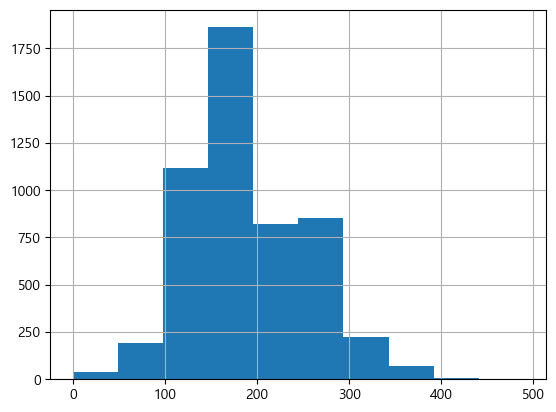

In [26]:
#탑승률 예측모델 만들기(탑승률 = 평균탑승객_proxy, 공급좌석수가 없는 관계로 평균탑승객으로 탑승률 대체)

#2025년 데이터 활용
df1=df[(df['년도']==2025) & (df['운항(편)'] > 0)].copy()

#eda
# df1.head()
# df1.shape
# df1.info() #결측치 없음
df1 = df1.drop(['년월_dt'], axis=1).copy()
# df1.describe(include='O')
#타깃 시각화
df1['평균탑승객(명/편)_proxy'].hist()


In [27]:
# train/validation/test 데이터 분류(시계열 기준)
train = df1[df1['월'] <= 3].copy()
val = df1[(df1['월'] >= 4) & (df1['월'] <= 5)].copy()
test = df1[df1['월'] == 6].copy()
print(train.shape, val.shape, test.shape)

#x,y값 분류 
x_tr = train.drop('평균탑승객(명/편)_proxy', axis=1)
y_tr = train['평균탑승객(명/편)_proxy']

x_val = val.drop('평균탑승객(명/편)_proxy', axis=1)
y_val = val['평균탑승객(명/편)_proxy']

x_test = test.drop('평균탑승객(명/편)_proxy', axis=1)
y_test = test['평균탑승객(명/편)_proxy']
print(x_tr.shape, x_val.shape, x_test.shape)

(2624, 20) (1724, 20) (846, 20)
(2624, 19) (1724, 19) (846, 19)


In [28]:
x_tr.describe(include='O')
x_val.describe(include='O')
x_test.describe(include='O')

,항공사(IATA),항공사명,국제_국내,정기_부정기,도착_출발,공항,영문공항명,지역,한글국가명,영문도시명,여객_화물
count,846,846,846,846,846,846,846,846,846,846,846
unique,79,79,2,2,2,163,163,7,52,159,1
top,KE,대한항공,국제,정기,도착,KIX,Kansai International Airport,아시아태평양,중국,Tokyo,여객
freq,186,186,837,803,425,26,26,680,198,31,846


In [29]:
#데이터 병합
print(x_tr.shape, x_val.shape, x_test.shape)
df1 = pd.concat([x_tr, x_val, x_test])
print(df1.shape)

(2624, 19) (1724, 19) (846, 19)
(5194, 19)


In [30]:
#인코딩
#one_hot
# df1 = pd.get_dummies(df1)
# df1.shape

#label
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = df1.select_dtypes(include='O').columns

for col in cols:
    df1[col] = le.fit_transform(df1[col])

# df1.head()

In [31]:
#데이터 분할
x_tr = df1.iloc[:len(x_tr)].copy()
x_val = df1.iloc[len(x_tr):len(x_tr + x_val)].copy()
x_test = df1.iloc[len(x_tr + x_val):].copy()
print(x_tr.shape, x_val.shape, x_test.shape)

(2624, 19) (1724, 19) (846, 19)


In [32]:
# 🔥 train 기준으로 columns 맞추기(미진행)
# x_val = x_val.reindex(columns=x_tr.columns, fill_value=0)
# x_test = x_test.reindex(columns=x_tr.columns, fill_value=0)
# print(x_tr.shape, x_val.shape, x_test.shape)

#모델링,학습 및 예측
#randomforest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)
rf.fit(x_tr, y_tr)
pred = rf.predict(x_val)

#linear
# from sklearn.linear_model import LinearRegression
# lr = LinearRegression()
# lr.fit(x_tr, y_tr)
# pred = lr.predict(x_val)

#LightGBM
# import lightgbm as lgb
# lgbm = lgb.LGBMRegressor(random_state=0, verbose=-1)
# lgbm.fit(x_tr, y_tr)
# pred = lgbm.predict(x_val)


In [33]:
#평가
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

rmse = root_mean_squared_error(y_val, pred)
print('rmse:', rmse)

mse = mean_squared_error(y_val, pred)
print('mse:', mse)

mae = mean_absolute_error(y_val, pred)
print('mae:', mae)

r2 = r2_score(y_val, pred)
print('r2:', r2)

#oh_rf
# rmse: 17.757871466899214
# mse: 315.3419990349132
# mae: 9.079676044083525
# r2: 0.921939669596133

#oh_lr
# rmse: 28.61206968010662
# mse: 818.6505313792767
# mae: 19.49412168210477
# r2: 0.7973497626058609

#lb_rf
# rmse: 13.862064337897953
# mse: 192.1568277080222
# mae: 7.650892865429235
# r2: 0.9524331503378767

#lb_lr
# rmse: 38.320303172944975
# mse: 1468.4456352664167
# mae: 27.39079685309935
# r2: 0.6364983040006615



rmse: 13.862064337897953
mse: 192.1568277080222
mae: 7.650892865429235
r2: 0.9524331503378767


In [34]:
#2025년 데이터 활용
df1=df[(df['년도']==2025) & (df['운항(편)'] > 0)].copy()

#eda
# df1.head()
# df1.shape
# df1.info() #결측치 없음
# df1['년월_dt'] = pd.to_datetime(df1['년월_dt'])
df1 = df1.drop(['년월_dt'], axis=1).copy()
# df1.describe(include='O')
#타깃 시각화
# df1['평균탑승객(명/편)_proxy'].hist()

# train/validation/test 데이터 분류(시계열 기준)
train = df1[df1['월'] <= 3].copy()
val = df1[(df1['월'] >= 4) & (df1['월'] <= 5)].copy()
test = df1[df1['월'] == 6].copy()
print(train.shape, val.shape, test.shape)

#x,y값 분류 
x_tr = train.drop('평균탑승객(명/편)_proxy', axis=1)
y_tr = train['평균탑승객(명/편)_proxy']

x_val = val.drop('평균탑승객(명/편)_proxy', axis=1)
y_val = val['평균탑승객(명/편)_proxy']

x_test = test.drop('평균탑승객(명/편)_proxy', axis=1)
y_test = test['평균탑승객(명/편)_proxy']
print(x_tr.shape, x_val.shape, x_test.shape)

#원래->새이름 매핑(lgbm, 컬럼명 내 특수문자로 인한 오류 방지)
#x_tr기준
original_cols = x_tr.columns.tolist()
new_cols = [f'f{i}' for i in range(1, len(original_cols)+1)]
col_map = dict(zip(original_cols, new_cols))
reverse_col_map = dict(zip(new_cols, original_cols))

#컬럼명 변경
x_tr = x_tr.rename(columns=col_map)
x_val = x_val.rename(columns=col_map)
x_test = x_test.rename(columns=col_map)

#데이터 병합
print(x_tr.shape, x_val.shape, x_test.shape)
df1 = pd.concat([x_tr, x_val, x_test])
print(df1.shape)

#인코딩
#one_hot
# df1 = pd.get_dummies(df1)
# df1.shape

#label
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = df1.select_dtypes(include='O').columns

for col in cols:
    df1[col] = le.fit_transform(df1[col])

# df1.head()

#데이터 분할
x_tr = df1.iloc[:len(x_tr)].copy()
x_val = df1.iloc[len(x_tr):len(x_tr + x_val)].copy()
x_test = df1.iloc[len(x_tr + x_val):].copy()
print(x_tr.shape, x_val.shape, x_test.shape)

#LightGBM
import lightgbm as lgb
lgbm = lgb.LGBMRegressor(random_state=0, verbose=-1)
lgbm.fit(x_tr, y_tr)
pred = lgbm.predict(x_val)

#평가
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

rmse = root_mean_squared_error(y_val, pred)
print('rmse:', rmse)

mse = mean_squared_error(y_val, pred)
print('mse:', mse)

mae = mean_absolute_error(y_val, pred)
print('mae:', mae)

r2 = r2_score(y_val, pred)
print('r2:', r2)

# rmse: 12.801442161609735
# mse: 163.8769214170393
# mae: 7.345518382568733
# r2: 0.9594336096348323

(2624, 20) (1724, 20) (846, 20)
(2624, 19) (1724, 19) (846, 19)
(2624, 19) (1724, 19) (846, 19)
(5194, 19)
(2624, 19) (1724, 19) (846, 19)
rmse: 12.801442161609735
mse: 163.8769214170393
mae: 7.345518382568733
r2: 0.9594336096348323


In [35]:
#test데이터 예측
pred = lgbm.predict(x_test)
result = pd.DataFrame({'obs':y_test.values, 'pred':pred})
result['error'] = result['obs'] - result['pred']
result['abs_e'] = result['error'].abs()
result

# 결과파일 생성
result.to_csv('../data/pred_result.csv', index=False)

In [36]:
#test데이터 검증
rmse = root_mean_squared_error(y_test, pred)
print('rmse:', rmse)

mse = mean_squared_error(y_test, pred)
print('mse:', mse)

mae = mean_absolute_error(y_test, pred)
print('mae:', mae)

r2 = r2_score(y_test, pred)
print('r2:', r2)

# rmse: 11.441644833380039
# mse: 130.91123649321213
# mae: 6.740896191872195
# r2: 0.9661991258523118

rmse: 11.441644833380039
mse: 130.91123649321213
mae: 6.740896191872195
r2: 0.9661991258523118


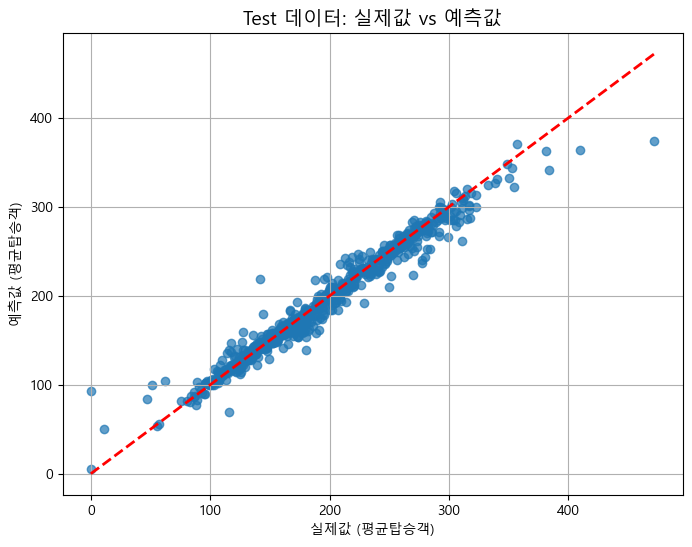

In [37]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, pred, alpha=0.7)

# y = x 대각선(완벽 예측 기준선)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'r--', linewidth=2
)

plt.xlabel('실제값 (평균탑승객)')
plt.ylabel('예측값 (평균탑승객)')
plt.title('Test 데이터: 실제값 vs 예측값', fontsize=14)
plt.grid(True)
plt.show()

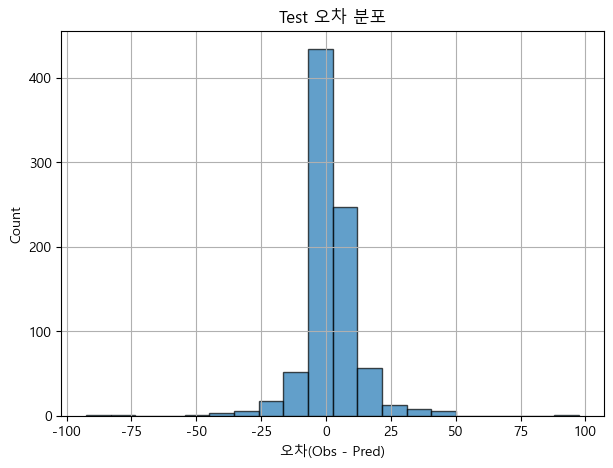

In [38]:
errors = y_test - pred

plt.figure(figsize=(7,5))
plt.hist(errors, bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('오차(Obs - Pred)')
plt.ylabel('Count')
plt.title('Test 오차 분포')
plt.grid(True)
plt.show()

c:\Users\최다연\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



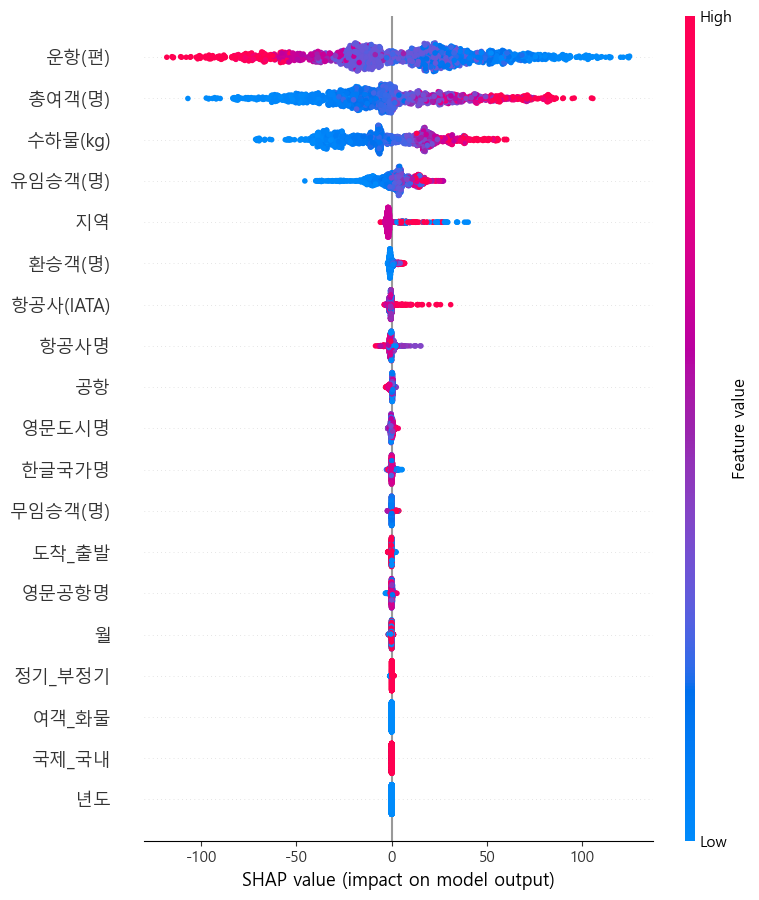

In [39]:
import shap

#Explainer 생성
explainer = shap.TreeExplainer(lgbm)

#shap values 계산(검증 데이터 기준)
shap_values = explainer.shap_values(x_val)

#전체 feature 중요도 시각화 - summary plot
x_val_renamed = x_val.rename(columns=reverse_col_map)
plt.figure(figsize=(10,7))
shap.summary_plot(shap_values, x_val_renamed, plot_type='dot')

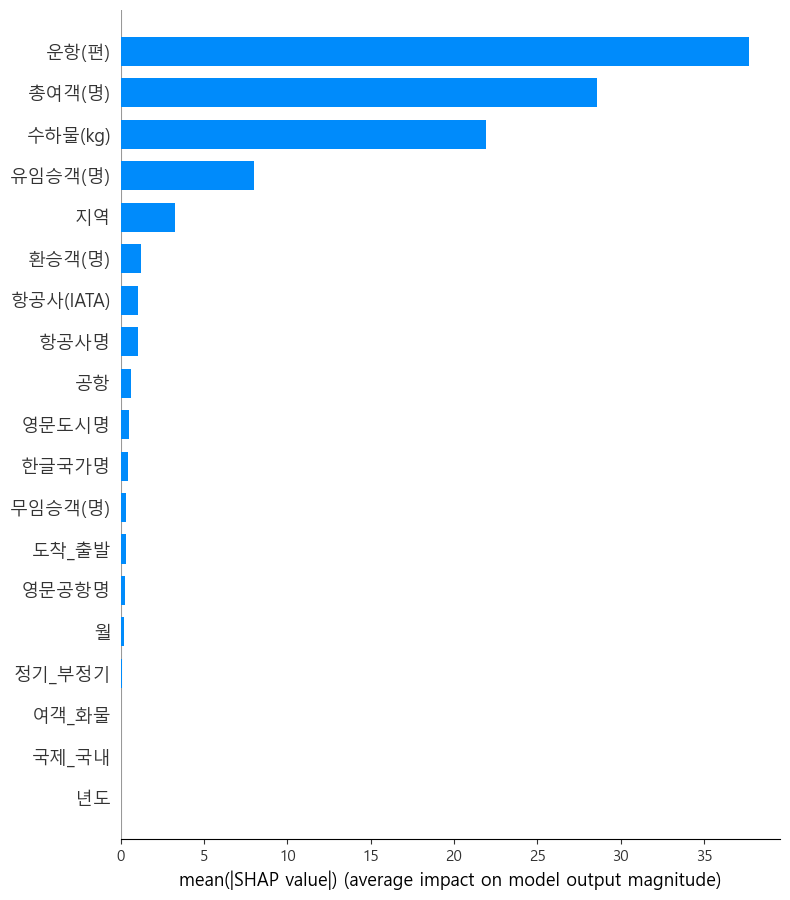

In [40]:
#bar plot
plt.figure(figsize=(10,7))
shap.summary_plot(shap_values, x_val_renamed, plot_type='bar')